## 1  For each of the three data sets plotted above (I, II and III), answer the following:

a. Does the data show a positive or negative correlation between x and y?
        plot 1: no correlation between x and y, y value is random around 20 
        plot 2:positive correlation
        plot 3:negative correlation

b. Which function (equation) best describes each data set? In these equations, ε represents
random noise, with mean value εˉ = 0 and standard deviation σε = 1 .
i. f(x) = 1 + 2x + ε
ii. f(x) = 20 + ε
iii. f(x) = 20 − x + ε

    i describes plot 2
    ii decribes plot 1
    iii decribes plot 3

c. Which regression table corresponds to each plot?

    i matches plot 2 
    ii matches plot 3
    ii match plot 1

## 2. ISLR chapter 3, problem 3 (page 120)
Y = 50 + 20(gpa) + 0.07(iq) + 35(gender) + 0.01(gpa * iq) - 10 (gpa * gender)

        a. iii is true
           Because 35*gender - 10 * gpa * gender are the only factor that is related to gender that can influence the salary.
           Given a high gpa over 3.5., (35*gender - 10 * gpa * gender) is larger than 0.
           So For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.
        
        b.Predict the salary of a female with IQ of 110 and a GPA of 4.0.         
        = 50 + 20(4) + 0.07(110) + 35(1) + 0.01(4 * 110) - 10 (4 * 1) 
        = 137.1

        c. False. we still need to consider the p-value of the regression coefficient.


## 3. ISLR chapter 3, problem 4 (pages 120-121)

    a.  Since we know that the relationship between X and Y is linear, we can asusume the least sqaure line is a good regression model.
        Therefore, the training RSS for the linear regression should be lower than the one for the cubic regression.
        
    b. If there is overfitting in training, then the test RRS should be higher due to the divergence of matching.
    So in testing,the test RRS of cubic regression should be higher than the test RRS of the linear regression.
    
    c. Cubic regression has lower train RSS than the linear regression because a more complex model should reduce the train RRS.
    
    d. In this case, the info is not enough to predic which test RSS would be lower because we do not know how far it is from linear. 
  

# 4. In this problem, we will simulate a dataset and use multiple linear regression to investigate it. 

Imagine we conduct a survey of N=100 students and ask them how much time per week they spend on work (
) and how much time on play ( ). We also ask them about their overall level x1 x2 of satisfaction ( y ),
which we take to be the outcome. Download the dataset HW2.csv from the course website, which
contains these data.

In [98]:
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#read data
broken_df = pd.read_csv('/Users/xuzhaokai/Desktop/109 HW2/HW2.csv')
dataFrame = broken_df.values
print dataFrame.shape

(100, 3)


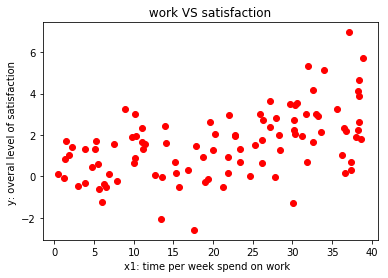

the relationship between x1 and y :
x1 and y are positively correlated and they are in non-linear relationship


In [99]:
# 4. a Make a scatter plot showing y vs. x1 . 
# Comment on the relationship between these variables: 
# dothey appear correlated (positively or negatively)? 
# Is their relationship linear or non-linear?

import matplotlib.pyplot as plt
x1 = dataFrame[:,0]
x2 = dataFrame[:,1]
y = dataFrame[:,2]

plt.plot(x1, y, 'ro')
plt.xlabel("x1: time per week spend on work  ")
plt.ylabel("y: overal level of satisfaction ")
plt.title (" work VS satisfaction ")
plt.show()

print ("the relationship between x1 and y :")
print ("x1 and y are positively correlated and they are in non-linear relationship") 

In [100]:
#4. b  Fit a simple linear regression of y vs. x1
# Report the estimated intercept and slope, and make a plot showing 
# the data points together with the regression line. 
# Is there a statistically significant effect of x1 on y ?

# sm is better for sklearn to analyze data 
from sklearn import linear_model

reg = linear_model.LinearRegression()

# array to matrix 
x1= x1.reshape(-1, 1)
y = y.reshape(-1,1)

# train the model
reg.fit (x1, y)

#obtain slope and intercept
slope = reg.coef_[0][0]
intercept = reg.intercept_

print "slope: ",round(slope, 5) 
print "intercept: ",round(intercept, 5) 

slope:  0.07105
intercept:  0.06039


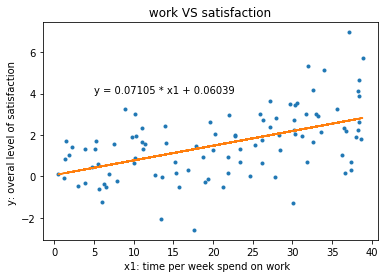

In [101]:
# plot the data 
plt.xlabel("x1: time per week spend on work  ")
plt.ylabel("y: overal level of satisfaction ")
plt.title (" work VS satisfaction ")
plt.plot(x1, y, '.')
plt.plot(x1, slope * x1 + intercept, '-')
plt.text(5,4,"y = 0.07105 * x1 + 0.06039")
plt.show()

In [102]:
#4 b Is there a statistically significant effect of x1 on y ?
print "I do not thnk their is a statistically significant effect of x1 on y because \
the p value is zero accourding to the below table, which means the null hypothesis is rejected"

I do not thnk their is a statistically significant effect of x1 on y because the p value is zero accourding to the below table, which means the null hypothesis is rejected


In [103]:
# 4.c 
import numpy as np
import statsmodels.api as sm

X_1=sm.add_constant(x1)
model = sm.OLS(y,X_1)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     34.90
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           5.04e-08
Time:                        23:07:03   Log-Likelihood:                -176.08
No. Observations:                 100   AIC:                             356.2
Df Residuals:                      98   BIC:                             361.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0604      0.291      0.207      0.8

In [104]:
# 4.c What is the 95% confidence interval for the slope of x1 ?
print "\n the confidence interval for the slope of x1 is",results.conf_int(alpha=0.05) 


 the confidence interval for the slope of x1 is [[-0.51732074  0.63810476]
 [ 0.0471836   0.09492252]]


In [105]:
# 4. d
# fit a multiple linear regression with x1 and x2 as independent variables.
#Report a table with the regression results (similar to Table 3.9 on page 88 in ISLR). 

# THE table contains: coefficent /  std error  //  t-statistic    /  p-value  
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

#stack x1 and x2 to a 2D matrix 
x2 = x2.reshape(-1,1)
xData = np.vstack((x1,x2))
xData = xData.reshape(-1,2)
X_1=sm.add_constant(xData)

# train the model
model2 = sm.OLS(y,X_1)
results2 = model2.fit()
print results2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.01086
Date:                Thu, 11 Oct 2018   Prob (F-statistic):              0.989
Time:                        23:07:08   Log-Likelihood:                -191.30
No. Observations:                 100   AIC:                             388.6
Df Residuals:                      97   BIC:                             396.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6114      0.432      3.726      0.0

In [106]:
# Which parameters have a statistically significant effect?
print "x2 has a more statistically significant effect"

x2 has a more statistically significant effect


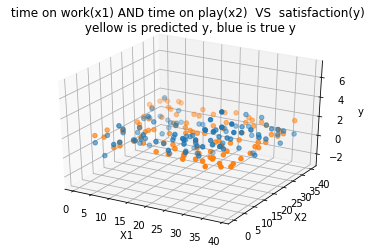

In [107]:
#  4. e Make a scatter plot showing y vs. yˆ, the predicted value of y
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

# plot all points 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title(' time on work(x1) AND time on play(x2)  VS  satisfaction(y)\
 \n yellow is predicted y, blue is true y')
ax.set_xlabel('X1 ')
ax.set_ylabel('X2 ')
ax.set_zlabel('y ')
#scatter plot showing y
ax.scatter(x1, x2, y)
#surface plot showing y
y_predict = 1.6114 * X_1[:,0] +  (-0.0006) * X_1[:,1] + (-0.0019)* X_1[:,2]
ax.scatter(x1, x2, y_predict) 
plt.show()


In [122]:
# 4. f   Create a categorical variable with 3 levels called WorkType, 
# where WorkType=”Idle” for x1 < 10,
# WorkType=”Diligent” for 10 ≤ x1 < 30 , 
# and WorkType=”Workaholic” for x1 ≥30 . 
# Fit a linear regression of y against WorkType and x2 , and report the regression table
import numpy as np

#break into three types 
# replace each type with two dimension
# Idle == 0 0  Diligent = 0 1  Workaholic == 1 1
Idle = []
Diligent = []
Workaholic = []
newData = np.zeros((100,5))

for row in range(dataFrame.shape[0]):
    data = dataFrame[row,0]
    if (data <10):
        newData[row][0] = 1
        newData[row][1] = 0
        newData[row][2] = 0
        newData[row][3] = dataFrame[row,1]
        newData[row][4] = dataFrame[row,2]
    elif data <=30 and data >=10:
        newData[row][0] = 1
        newData[row][1] = 0
        newData[row][2] = 1
        newData[row][3] = dataFrame[row,1]
        newData[row][4] = dataFrame[row,2]
    else:
        newData[row][0] = 1
        newData[row][1] = 1
        newData[row][2] = 0
        newData[row][3] = dataFrame[row,1]
        newData[row][4] = dataFrame[row,2]

In [131]:
# train the model
print "In the Table:\
x1 and x2 are either 0 or 1 \
where Idle == 0 0  Diligent = 0 1  Workaholic == 1 1 \
x3 represent x2 in prev which is how much time to play \
"
model_1 = sm.OLS( newData[:,4], newData[:,0:4])
result_1 = model_1.fit()
print result_1.summary()

In the Table:x1 and x2 are either 0 or 1 where Idle == 0 0  Diligent = 0 1  Workaholic == 1 1 x3 represent x2 in prev which is how much time to play 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     45.71
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.94e-18
Time:                        23:19:01   Log-Likelihood:                -146.95
No. Observations:                 100   AIC:                             301.9
Df Residuals:                      96   BIC:                             312.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [146]:
# 4.g  different “levels” of this categorical variable. 
# What is your interpretation of the term corresponding to WorkType=Workaholic?
print "Type 1"
print result_1.params
print "Type 2"
print result_2.params
print "Type 3"
print result_3.params
print "According to the above data, I think when workType == Workaholic\
the time on work contributes more to their satisfaction and  \
the time on play has a negative effect on their satisfaction "

Type 1
[ 1.49740182  0.00271597 -0.03983865]
Type 2
[ 1.72912567  0.04920683 -0.0816793 ]
Type 3
[ 1.63103149  0.0913222  -0.12248419]
According to the above data, I think when workType == Workaholicthe time on work contributes more to their satisfaction and  the time on play has a negative effect on their satisfaction 
